# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd
import numpy as np

## Part 1: Merge multiple DataFrame objects along columns ( 5 pts )

Given the following temperature datasets, merge them to a large dataframe using pandas

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

df_ = pd.concat([df1,df2],axis=0)
df_



,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
df3 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv')
df4 = pd.read_csv(' https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv')

df_inter = pd.merge(df_,df4,on=['ID']) #Merge based on ID b/c ID is a mutual column in both dfs
df_inter['FIPS 10-4'] = df_inter['ID'].str[0:2]

df = pd.merge(df_inter,df3,on=["FIPS 10-4"])#Merge based on ID b/c ID is a mutual column in both dfs

df.drop(["STNELEV","FIPS 10-4","ISO 3166"],axis=1,inplace=True)
df = df.rename(columns={'Name':"Country"})
df.iloc[:,2:14] = df.iloc[:,2:14]/100 #normalize the temperatures
df


,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,NAME,Country
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZA000067743,2020,NaN,24.00,23.75,NaN,NaN,NaN,16.05,NaN,NaN,NaN,NaN,NaN,-17.8170,25.817,LIVINGSTONE,Zambia
181311,ZAM00067663,2011,22.80,22.84,22.50,21.90,20.00,18.40,17.00,18.65,22.80,24.90,24.65,24.00,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181312,ZAM00067663,2012,23.10,22.34,22.95,19.70,18.50,17.50,NaN,NaN,NaN,NaN,NaN,NaN,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181313,ZAM00067663,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.85,-14.4500,28.467,KABWE_MILLIKEN,Zambia


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df,country,year_begin,year_end,month):
    '''
    Inputs: df,a data frame. country, a string. year_begin,year_end, two integers specifying the time period
    month, an integer 
    Outputs: the temperature at the specifies station during the specified year and month
    
    '''
    selections = (df['Country'] == country) & (df['Year']>= year_begin) & (df['Year']<= year_end)
    df_1 = df[selections]
    df_1["Month"] = month
    result = df_1[['NAME', 'LATITUDE', 'LONGITUDE', 'Country','Year',"Month",f'VALUE{month}']]
    result = result.rename(columns={f'VALUE{month}':"Temp"})
    
    return result

Run this example and check if you get the correct result, your obtained dataframe looks like:

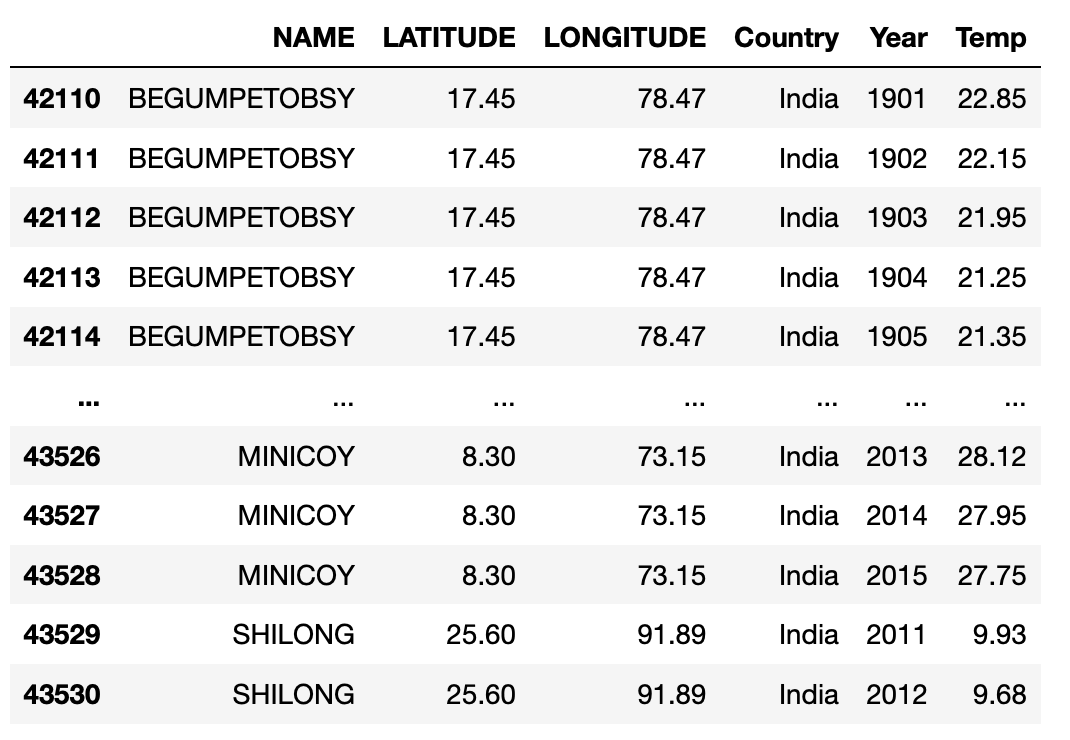

In [5]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
42110,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
42111,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
42112,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
42113,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
42114,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
43526,MINICOY,8.30,73.15,India,2013,1,28.12
43527,MINICOY,8.30,73.15,India,2014,1,27.95
43528,MINICOY,8.30,73.15,India,2015,1,27.75
43529,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

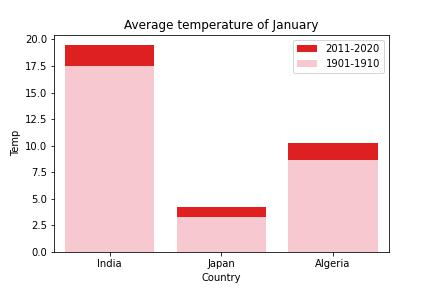

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

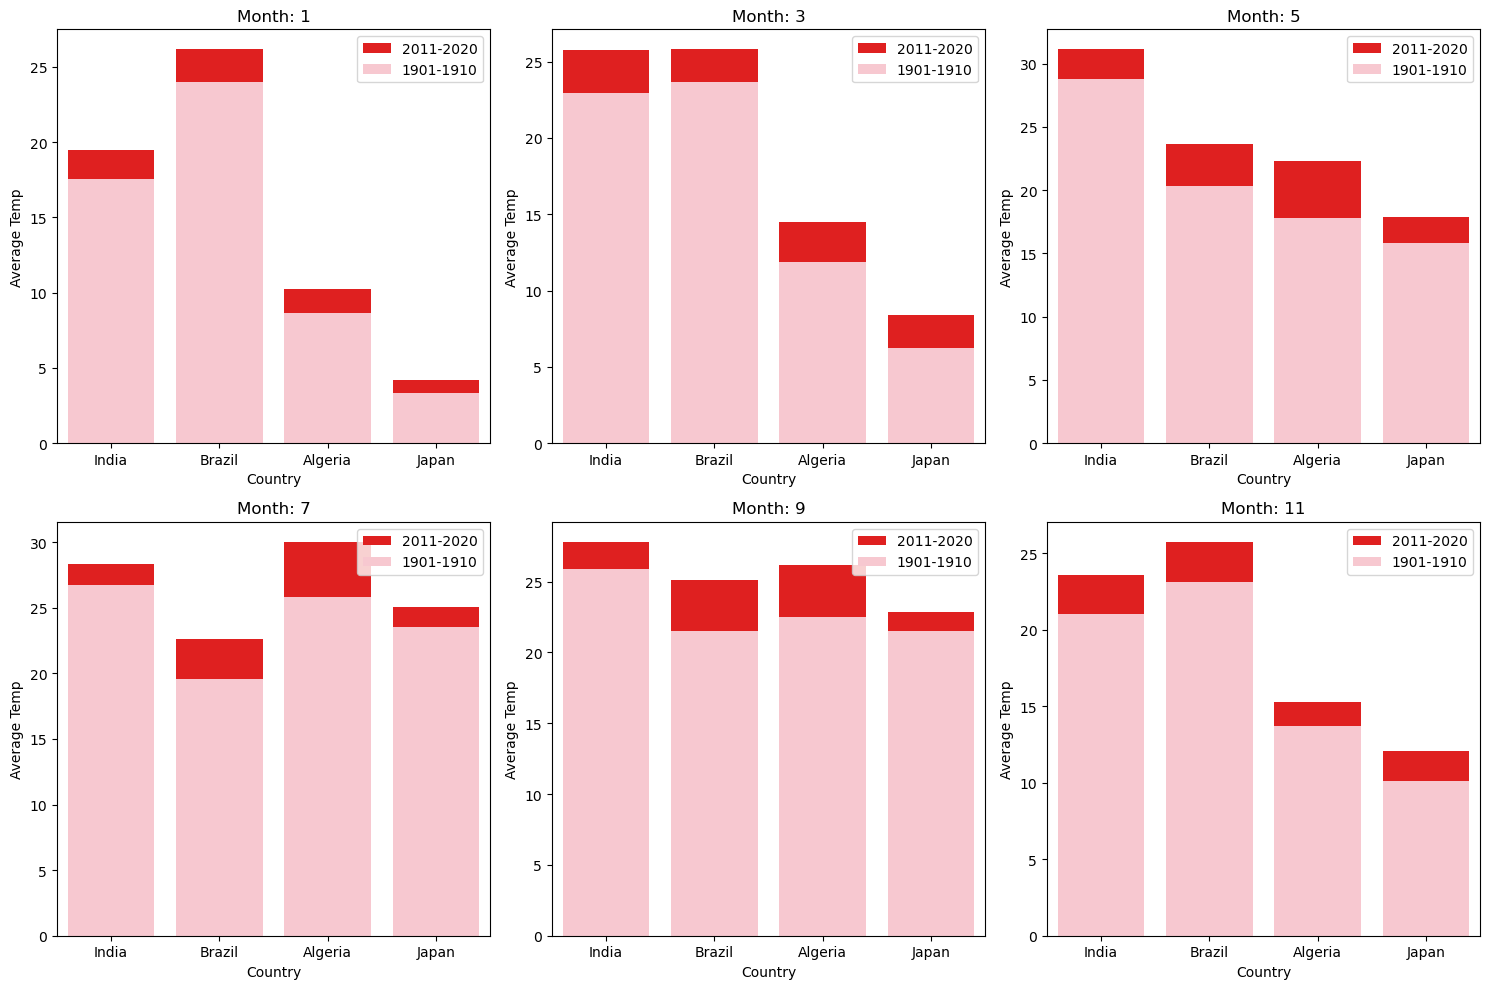

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def helper(a, m):
    '''
    Query average temperatures for a country 'a' in month 'm' across two periods.
    Inputs: a, a string that specifies the country name; m, an integer that
    Output: t1 and t2, average temperatures of country a in month m from two time periods
    '''
    temp_early = query_climate(df=df, country=a, year_begin=1901, year_end=1910, month=m)
    temp_late = query_climate(df=df, country=a, year_begin=2011, year_end=2020, month=m)
    t_1 = np.mean(temp_early["Temp"])
    t_2 = np.mean(temp_late["Temp"])
    return t_1, t_2

def df_builder(m):
    '''
    Builds the dataframes for plotting.
    Input: m, an integer specifying the month of interest
    Output: df1,df2,two dataframes with 4 countries,average temperature of the month interested from two periods
    1901-1910 and 2011-2020
    '''
    countries = ["India", "Brazil", "Algeria", "Japan"]
    data1 = {'Country': [], 'Average Temp': [],'Year':[]}
    data2 = {'Country': [], 'Average Temp': [],'Year':[]}
    for country in countries:
        t_early, t_late = helper(country, m)
        data1['Country'].extend([country])
        data1['Average Temp'].extend([t_early])
        data1['Year'].extend(["1901-1910"])
        data2['Country'].extend([country])
        data2['Average Temp'].extend([t_late])
        data2['Year'].extend(["2011-2020"])
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)                                
    return df1,df2

fig, ax = plt.subplots(2, 3, figsize=(15, 10)) #create the subplots 
months = [1, 3, 5, 7, 9, 11]

for i, month in enumerate(months): # loop trough the axis-month value pair to plot for each month
    df_plot1 = df_builder(month)[0]
    df_plot2 = df_builder(month)[1] 
    # We plot two barlots,with the 2011-2020 one plotted first to show the increase in average temperature
    sns.barplot(data=df_plot2, x='Country', y='Average Temp', ax=ax.flat[i], color="red",label="2011-2020")
    sns.barplot(data=df_plot1, x='Country', y='Average Temp',ax=ax.flat[i], color="pink",label="1901-1910")
    ax.flat[i].set_title(f'Month: {month}')
    ax.flat[i].legend()
    
plt.tight_layout()
plt.show()


My Conclusion: 
The average temperature throughout the year in India, Brazil, Algeria, and Japan all increased from the time period 1901-1910 to the time period 2011-2020. The increase is most significant in September for these 4 countries.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [7]:
# Prepare a dataframe for visualzing temperature trends
df_vis = df.copy()
df_vis = df_vis.set_index(["ID","Year","NAME","LONGITUDE","LATITUDE","Country"])
df_vis = df_vis.stack()
df_vis = df_vis.reset_index()
df_vis = df_vis.rename(columns = {"level_6"  : "Month" , 0 : "Temperature (C)"})
df_vis["Month"] = df_vis["Month"].str[5:].astype(int)

df_vis

,ID,Year,NAME,LONGITUDE,LATITUDE,Country,Month,Temperature (C)
0,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,1,10.34
1,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,2,8.44
2,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,3,11.64
3,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,4,15.34
4,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,5,15.64
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,4,19.70
1899683,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,5,18.50
1899684,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,6,17.50
1899685,ZAM00067663,2015,KABWE_MILLIKEN,28.467,-14.4500,Zambia,12,24.85


<Axes: xlabel='Year', ylabel='Temperature (C)'>

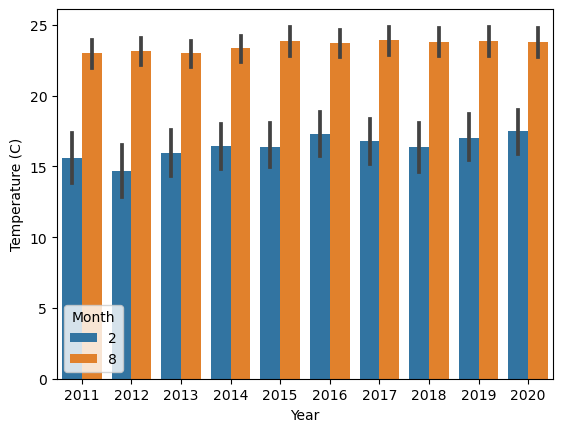

In [8]:
#A barplot on two month from 2011-2020
df_vis_1 = df_vis.groupby(["Month","Year","Country"])["Temperature (C)"].mean().reset_index()
df_vis_1 = df_vis_1[(df_vis_1["Month"].isin([2,8]))&(df_vis_1["Year"]>1911)]
sns.barplot(data=df_vis_1,x="Year",y="Temperature (C)",hue="Month",errorbar="ci")

The barplot illustrates changes in temperature in Feb and August from 2011 to 2020. Orange and blue represent August and February respectively. There is a steady increase in global average temperature in both months, with fluctuations between years.The errorbar associated with each temperature bar is confidence interval, where we can see the interval is larger for winter month and smaller for summer month, indicating larger variation in temperature across the globe in winter than in summer.
Conclusion: Increase in temperature in both summer and winter is a global trend from 2011 to 2020, where fluctuations are larger in winter month.

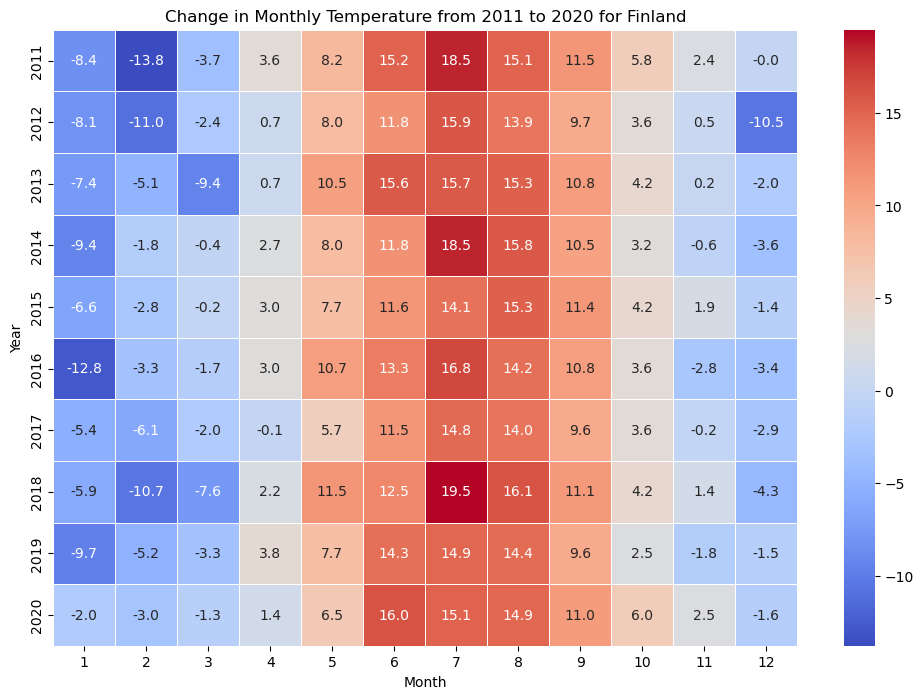

In [9]:
#A 2D heatmap of monthly temperature in Finland from 2011-2020
df_filtered = df_vis[(df_vis['Country'] == "Finland") & (df_vis['Year'] >=2011) & (df_vis['Year'] <= 2020)]
df_grouped = df_filtered.groupby(["Year", "Month"]).agg({"Temperature (C)": "mean"}).reset_index()
heatmap_data = df_grouped.pivot(index="Year", columns="Month", values="Temperature (C)")

# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size to your preferences
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title("Change in Monthly Temperature from 2011 to 2020 for Finland")
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


The 2_D heatmap showcased changes in monthly temperature in Finland from 2011 to 2020.The color code of the heatmap vividly illustrate temperature change with different shades of similar colors. Across the columns, temperature increases from January to July, then decreases from July to December.The leftmost column is the average temperature in January from 2011 to 2020. The average temprature in January increases from -8.4 to -2.0 degrees over the years.This trend holds true for February,March, and December as well.Summer temperature changes are less apparent but there is a jump in temperature from 2017 to 2020 in June,July and August. 
Seasonal variation are less clear because winters are warmer.In 2011,the temperature gap is 18.5-(-13.8)=32.3 degrees. But in 2020,the temperature gap is only 16.0-(-3.0)= 19.0 degrees. Seasons are blurred and avverage temperature over the years increases.
Conclusion: The 2_D heatmap showcases a trend of increasing temperatures in Finland from 2011 to 2020. The seasonal variations in temperatures are less obvious from 2011 to 2020 and winters are getting warmer, whihc is an effect of 
global warming.

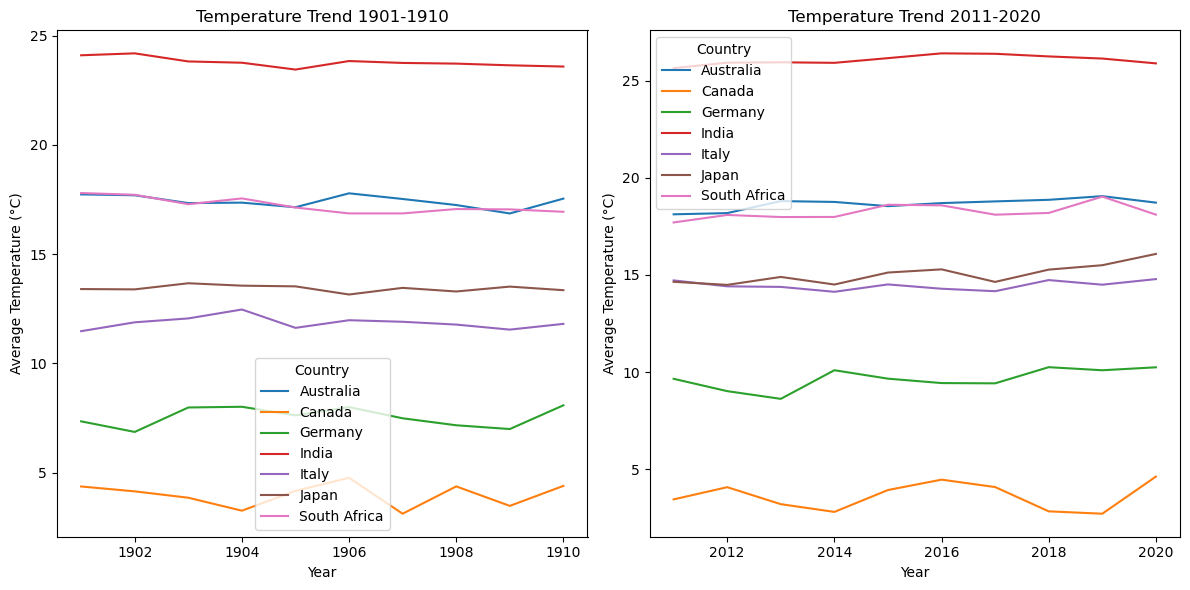

In [10]:
#Prepare a dataframe for plotting two line graphs
df_vis_3 = df_vis.groupby(["Country","Year"])["Temperature (C)"].mean().reset_index()
df_vis_3 = df_vis_3[(df_vis_3["Country"].isin(["Japan","Germany","Italy","Australia","India","Canada",
                                             "South Africa"]))]
df_vis_3_1 = df_vis_3[(df_vis_3["Year"] >= 2011) & (df_vis_3["Year"] <= 2020)]
df_vis_3_2 = df_vis_3[(df_vis_3["Year"] >= 1901) & (df_vis_3["Year"] <= 1910)]


plt.figure(figsize=(12, 6))

# First subplot for the first period
plt.subplot(1, 2, 1)  
sns.lineplot(data=df_vis_3_2, x="Year", y='Temperature (C)', color='blue',hue="Country")
plt.title('Temperature Trend 1901-1910')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# Second subplot for the second period
plt.subplot(1, 2, 2) 
sns.lineplot(data=df_vis_3_1, x="Year", y='Temperature (C)', color='gray',hue="Country")
plt.title('Temperature Trend 2011-2020')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')  
plt.tight_layout()
plt.show()


The two line plots illustrate the temperature trend in 7 countries at two time periods,1901 to 1910 and 2011 to 2020. The 7 countries chosen are representative of different continents and an overall trend of increasing temperature both witin two time periods and across the periods is evident.The left line graph shows the yearly temperature from 1901 to 1910 for the 7 countries, where India has the highest temperature and Canada has the lowest temperature. At the end of 1910, 4 out of the 7 countries has an increasing gradient. The right line graph shows the yearly temperature from 2011 to 2020, where India,Japan,Italy and Germany shows an evident increase in average temperature compared to 1901-1910 period.This well demonstrated global warming in Asia and Europe.
Conclusion: The line graph showcased an increase in average yearly temperature for 4 countries in Aisa and Europe, demonstrating a global warming effect from 1910 to 2020.

## Publish (5 pts)

Publish your work on quarto and github:

1. Publish your work using `quarto publish`. Please include your blog link. 

2. Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link. 